In [ ]:
import numpy as np
import itertools
from sklearn.metrics import average_precision_score
from tqdm import tqdm
import logging
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()

In [114]:
def create_binary_array(m, q):
    arr = np.zeros(m, dtype=int)
    indices = np.random.choice(m, q, replace=False)
    arr[indices] = 1
    return arr

def create_classifier_output(x, p):
    x = np.array(x)
    
    y = np.where(x == 1, np.random.binomial(1, p, size=x.shape),
                        np.random.binomial(1, 1 - p, size=x.shape))
    return y

def generate_all_binary_combinations(m):
    combinations = np.array(list(itertools.product([0, 1], repeat=m)))
    return combinations


In [ ]:
m = 16
q = 6

logging.basicConfig(
    filename=f'/home/chri6578/Documents/TLPCF/logs/results_{q}_{m}.log',       
    filemode='a',                 # Append mode ('w' for overwrite)
    level=logging.INFO,           # Set log level (INFO, DEBUG, etc.)
    format='%(message)s'
)

P_list = np.zeros(len(np.arange(0.1, 1, 0.05)))
S_m = generate_all_binary_combinations(m) # exhaustive

for i, alpha in tqdm(enumerate(np.arange(0.1, 1, 0.05))):
    p = (m - q)/(m - q*(2 - 1/alpha))

    b = create_binary_array(m, q) # random
    b_hat = create_classifier_output(b, p) # random

    AP_list = [ average_precision_score(b_hat, b_dash) for b_dash in S_m ]
    AP_list.remove(average_precision_score(b_hat, b))

    P_list[i] = np.mean(np.array(AP_list) < alpha)
    
    # LOG: alpha, P_list[i]
    logging.info(f"{alpha}, {P_list[i]}")
    

9it [01:24,  9.42s/it]


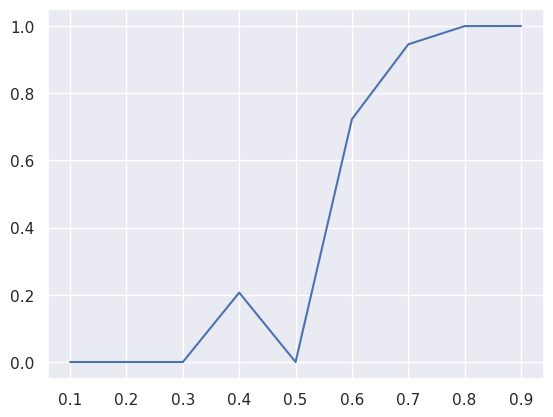

In [ ]:
# plt.plot(np.arange(0.1,1,0.1), P_list)

In [117]:
# plt.hist(AP_list)